In [4]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
np.random.seed(123)
category = np.random.choice(['A', 'B', 'C'], size=100)
outcome = np.random.choice(['Yes', 'No'], size=100)

In [6]:
# Create a contingency table
contingency_table = pd.crosstab(category, outcome)
contingency_table

col_0,No,Yes
row_0,,
A,15,15
B,17,15
C,19,19


In [7]:
# Perform chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

In [8]:
#Step 5: Interpret the results
print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_val)

Chi-square Statistic: 0.0850340136054421
Degrees of Freedom: 2
p-value: 0.9583741665019676


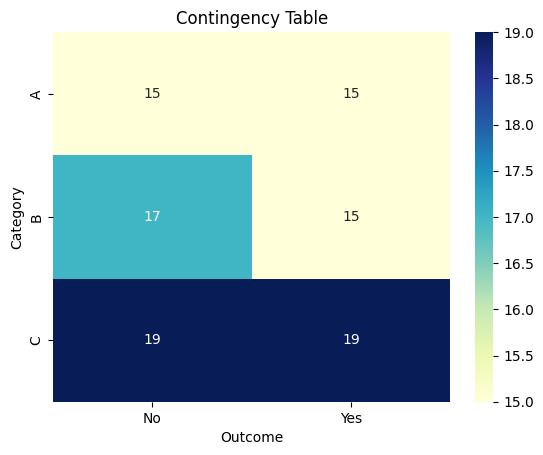

In [9]:
# Step 6: Visualize the contingency table (optional)
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title("Contingency Table")
plt.xlabel("Outcome")
plt.ylabel("Category")
plt.show()

In [10]:
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]

In [11]:
from scipy.stats import wilcoxon
res = wilcoxon(d)
res.statistic, res.pvalue
print("res.statistic:", res.statistic)
print("res.pvalue:", res.pvalue)

res.statistic: 24.0
res.pvalue: 0.041259765625


In [12]:
res = wilcoxon(d, method= "approx")
res.statistic, res.pvalue
print("res.statistic:", res.statistic)
print("res.pvalue:", res.pvalue)

res.statistic: 24.0
res.pvalue: 0.04088813291185591


In [13]:
bloodpressure1 = pd.read_excel("/Volumes/NGS/Myytcode/codeforytv/wilcoxontest-1.xlsx",sheet_name = 1)

In [14]:
bloodpressure1

,Subject,Before,After
0,1,135,114
1,2,142,118
2,3,137,111
3,4,122,132
4,5,147,121
5,6,151,130
6,7,131,115
7,8,117,111
8,9,154,129
9,10,143,122


In [15]:
from scipy import stats
import matplotlib.pyplot as plt

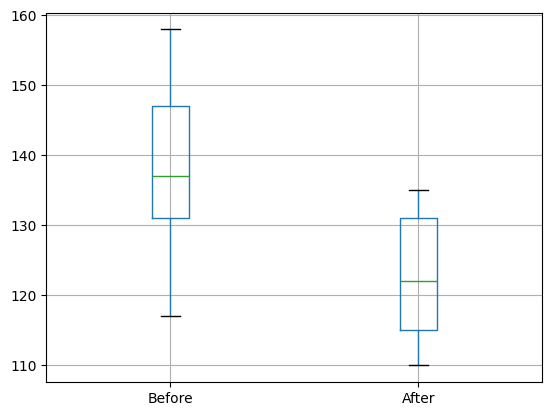

In [16]:
boxplot = bloodpressure1.boxplot(column=['Before', 'After'])

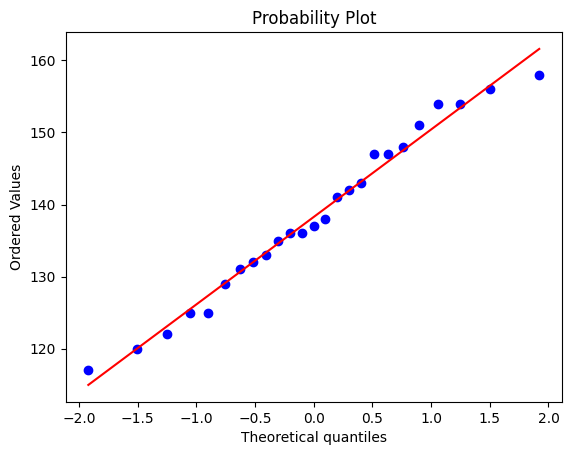

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Probplot for 'Before' data with blue color
stats.probplot(bloodpressure1['Before'], dist="norm", plot=plt)
plt.show()


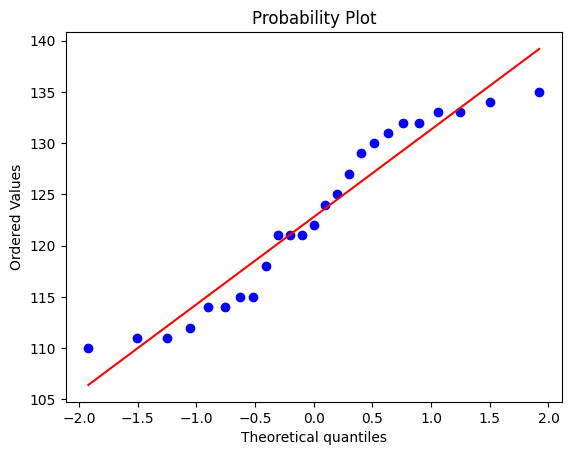

In [18]:
# Probplot for 'After' data with red color
stats.probplot(bloodpressure1['After'], dist="norm", plot=plt)

plt.show()


In [19]:
statistics, pvalue =  stats.shapiro(bloodpressure1['Before'])
print("statistic:", statistics)
print("pvalue:", pvalue)

statistic: 0.9717859625816345
pvalue: 0.690586268901825


In [20]:
statistics, pvalue =  stats.shapiro(bloodpressure1['After'])
print("statistic:", statistics)
print("pvalue:", pvalue)

statistic: 0.9164829254150391
pvalue: 0.04262892156839371


In [21]:
stats.wilcoxon(bloodpressure1['Before'], bloodpressure1['After'],
               alternative='two-sided',
               method='approx',
               zero_method= "wilcox")

WilcoxonResult(statistic=18.0, pvalue=9.974170757143121e-05)

# Wilcoxon Signed Rank test in Python #

In [32]:
import pandas as pd
from scipy import stats
from scipy.stats import wilcoxon


In [33]:
data_pressure = pd.read_excel("wilcoxontest-1.xlsx", sheet_name=1)

## normality##


In [34]:
statistics, p_value  = stats.shapiro(data_pressure["Before"])
print("Shapiro Result:")
print("Statistics:", statistics)
print("p-value:", p_value)

Shapiro Result:
Statistics: 0.9717859625816345
p-value: 0.690586268901825


In [35]:
statistics, p_value  = stats.shapiro(data_pressure["After"])
print("Shapiro Result:")
print("Statistics:", statistics)
print("p-value:", p_value)

Shapiro Result:
Statistics: 0.9164829254150391
p-value: 0.04262892156839371


#### 1st method for wilcoxon test from scipy

In [36]:
statistics, p_value =   stats.wilcoxon(data_pressure["After"],data_pressure["Before"],  
               alternative="two-sided", method="exact")
print("Wilcoxon Result:")
print("Statistics:", statistics)
print("p-value:", p_value)


Wilcoxon Result:
Statistics: 18.0
p-value: 1.5079975128173828e-05


#### 2nd method for wilcoxon test from Pingouin

In [27]:
### convert data in longer format
dp1 =pd.melt(data_pressure,
        id_vars=['Subject'],
        value_vars=['Before', 'After'],
        var_name='Time',
        value_name='Pressure')
dp1

,Subject,Time,Pressure
0,1,Before,135
1,2,Before,142
2,3,Before,137
3,4,Before,122
4,5,Before,147
5,6,Before,151
6,7,Before,131
7,8,Before,117
8,9,Before,154
9,10,Before,143


In [28]:
import pingouin as pg
### check the normality
## dv = dependent variable
## group = independent variable
pg.normality(dp1, dv="Pressure", group="Time")

,W,pval,normal
Time,,,
Before,0.971786,0.690586,True
After,0.916483,0.042629,False


In [29]:
### wilcoxon test
pg.wilcoxon(data_pressure["After"],data_pressure["Before"], 
            alternative="two-sided", 
            method="exact", 
            correction=False)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,18.0,two-sided,0.000015,-0.889231,0.144


In [30]:
pg.compute_effsize(data_pressure["After"],data_pressure["Before"], 
                   paired=True,
                   eftype= "cohen")

-1.5189981723158585